In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

data = pd.read_csv("load.csv")
data.head()

,Unnamed: 0,date,temperature,relative_humidity,dew_point,apparent_temperature,surface_pressure,wind_speed,precipitation
0,0,2024-01-01 05:00:00+00:00,1.5725,75.5763,-2.2775,-2.1702,1009.8789,8.8548,0.0
1,1,2024-01-01 06:00:00+00:00,2.5725,74.1006,-1.5775,-1.4437,1009.9020,11.3842,0.0
2,2,2024-01-01 07:00:00+00:00,2.6725,74.3913,-1.4275,-1.0761,1010.0037,9.6933,0.0
3,3,2024-01-01 08:00:00+00:00,2.5225,75.7412,-1.3275,-0.9782,1009.8015,8.0900,0.0
4,4,2024-01-01 09:00:00+00:00,0.4725,88.3674,-1.2275,-2.9309,1009.5552,7.5170,0.0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16704.0,8351.500000,4822.173784,0.0000,4175.750000,8351.50000,12527.250000,16703.0000
temperature,16704.0,13.198898,10.096832,-16.8775,5.222500,13.92250,21.322500,40.1725
relative_humidity,16704.0,67.481774,19.019745,15.0983,52.498675,67.98370,83.683225,100.0000
dew_point,16704.0,6.666870,9.926589,-22.2275,-0.377500,7.67250,14.622500,24.5725
apparent_temperature,16704.0,11.514793,12.419974,-21.5116,1.504550,11.82095,21.397650,44.3088
surface_pressure,16704.0,1010.314622,7.692762,976.6310,1005.903175,1010.28540,1015.214400,1042.4696
wind_speed,16704.0,11.159804,6.079874,0.0000,6.720500,10.09450,14.650900,57.2954
precipitation,16704.0,0.139254,0.739737,0.0000,0.000000,0.00000,0.000000,19.8000


KeyError: 'Weather Type'

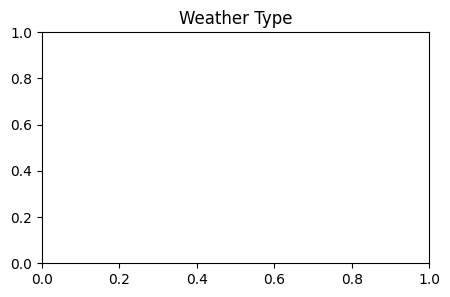

In [5]:
cat_col = [var for var in data.columns if data[var].dtypes =="object"]
cat_col

plt.figure(figsize=(5,3))
plt.title("Weather Type")
data["Weather Type"].value_counts().plot(kind = 'pie',autopct='%1.1f%%', colors=['#4A92E4','#CC6CE7','#E44AA4','#EDDF44'])
plt.show()


In [ ]:
new_data = data.copy()
encode = LabelEncoder()
for var in cat_col:
    new_data[var] = encode.fit_transform(new_data[var])
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.00,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.00,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.00,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.00,58.00,82.0000,109.00
Cloud Cover,13200.0,1.990227,1.012302,0.00,2.00,2.00,3.0000,3.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.80,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.00,3.00,7.0000,14.00
Season,13200.0,1.849394,1.164824,0.00,1.00,2.00,3.0000,3.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.00,5.00,7.5000,20.00
Location,13200.0,1.094091,0.791420,0.00,0.00,1.00,2.0000,2.00


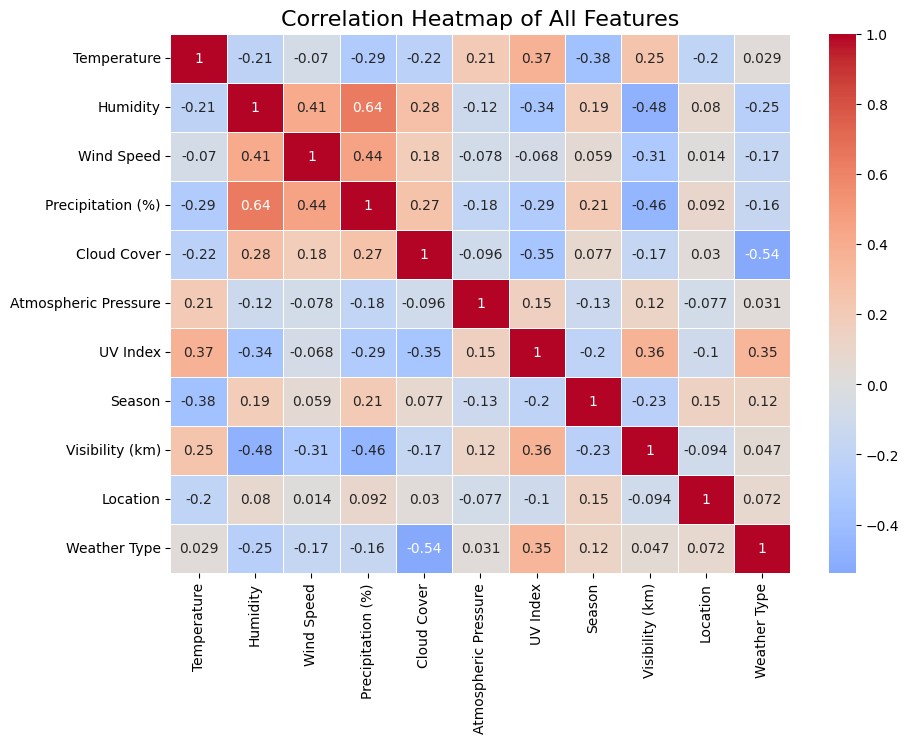

In [ ]:
cor_matrix = new_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()

In [ ]:
new_data.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
5,32.0,55,3.5,26.0,2,1010.03,2,2,5.0,1,0
6,-2.0,97,8.0,86.0,2,990.87,1,3,4.0,1,2
7,3.0,85,6.0,96.0,3,984.46,1,3,3.5,1,2
8,3.0,83,6.0,66.0,2,999.44,0,3,1.0,2,2
9,28.0,74,8.5,107.0,0,1012.13,8,3,7.5,0,3


In [ ]:
# print labels for 'Weather Type'
labels = encode.classes_

print("Labels for 'Weather Type' and encoded values")
for i, label in enumerate(labels):
    print(f"{label}: {i}")

Labels for 'Weather Type' and encoded values
Cloudy: 0
Rainy: 1
Snowy: 2
Sunny: 3


In [ ]:
x = new_data[['Cloud Cover', 'UV Index', 'Humidity', 'Weather Type']]
y = new_data['Weather Type']

In [ ]:
# Transform x, y into training data with a windows size of 3 features: Cloud Cover, UV Index, Weather Type with 7 days observation and target variable Weather Type, overlap is allowed with 3 days interval
observation_window = 14
overlap = 7
X, Y = [], []
for i in range(0, len(x) - observation_window + 1, overlap):
    X.append(x.iloc[i:i + observation_window].values) #0->13
    Y.append(y.iloc[i + observation_window]) #14
X = np.array(X).reshape(-1, observation_window * x.shape[1])
Y = np.array(Y)
print(X.shape, Y.shape)

(1884, 56) (1884,)


In [ ]:
#print 1st sample of X and Y
print("First sample of X:", X[0])
print("First sample of Y:", Y[0])

First sample of X: [ 3  2 73  1  3  7 96  0  0  5 64  3  0  7 83  3  2  1 74  1  2  2 55  0
  2  1 97  2  3  1 85  2  2  0 83  2  0  8 74  3  3  2 45  0  0 11 43  3
  3  3 59  0  2  0 87  2]
First sample of Y: 3


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)
model = RF(n_estimators=200, random_state=22, criterion='entropy')
model.fit(X_train, Y_train)

,n_estimators,200
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
forest_te_p = model.predict(X_test)
print(f"Test Acc --> {metrics.accuracy_score(Y_test, forest_te_p)*100}")

Test Acc --> 26.525198938992045


In [ ]:
# predict single sample
sample_index = 5
sample = X_test[sample_index].reshape(1, -1)
prob = model.predict_proba(sample)
predicted_class = np.argmax(prob, axis=1)
probabilities = prob[0][predicted_class[0]]
print(f"Predicted class for sample index {sample_index}: {predicted_class[0]}")
print(f"Probabilities for predicted class: {probabilities*100}%")
print("Actual class:", Y_test[sample_index])


Predicted class for sample index 5: 2
Probabilities for predicted class: 28.000000000000004%
Actual class: 2


array([[ 2,  4, 53,  0,  3,  5, 69,  3,  2,  0, 77,  1,  3,  3, 81,  1,
         3,  3, 56,  0,  0,  9, 48,  3,  3,  0, 64,  1,  2, 12, 98,  1,
         3,  4, 57,  0,  2,  3, 73,  0,  2,  4, 61,  1,  2,  1, 70,  0,
         3,  1, 72,  2,  3,  4, 76,  0]])